In [ ]:
"""
References:
https://www.renom.jp/notebooks/tutorial/neuralnetwork/download_mnist/notebook.html
https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/learn/lecture/8058990#questions/6261830
https://www.easy-tensorflow.com/tf-tutorials/neural-networks/two-layer-neural-network?view=article&id=124:two-layer-neural-network
https://github.com/nasirml/MachineLearningTensorFlow/blob/master/MultiLayerPerceptron/multi_layer_perceptron_mnist.py

"""

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

C:\Users\ianda\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
#%% create the MLP model

def multi_layer_perceptron_mnist(x, weights, biases):
    """
    MLP model with more than 2 hidden layers.
    """
    hidden_layer1 = tf.add(tf.matmul(x, weights['w_h1']), biases['b_h1'])
    hidden_layer1 = tf.nn.relu(hidden_layer1)   # apply ReLU non-linearity
    hidden_layer2 = tf.add(tf.matmul(hidden_layer1, weights['w_h2']), biases['b_h2'])
    hidden_layer2 = tf.nn.relu(hidden_layer2)

    out_layer = tf.add(tf.matmul(hidden_layer2, weights['w_out']), biases['b_out'])  # NO non-linearity in the output layer

    return out_layer

In [3]:
#%% construct the mlp model

# hyper-parameters
learning_rate = 0.01
num_iter = 30
batch_size = 100
display_step = 10       # display the avg cost after this number of epochs

# variables
num_input = 784         # units in the input layer 28x28 images
num_hidden1 = 128       # units in the first hidden layer
num_hidden2 = 256
num_output = 10         # units in the output layer 0 to 9. OR nClasses

# training_input data and labels
x = tf.placeholder('float', [None, num_input])     # training data
y = tf.placeholder('float', [None, num_output])    # labels

# weights and biases
weights = {
    'w_h1' : tf.Variable(tf.random_normal([num_input, num_hidden1])),       # w1, from input layer to hidden layer 1
    'w_h2' : tf.Variable(tf.random_normal([num_hidden1, num_hidden2])),     # w2, from hidden layer 1 to hidden layer 2
    'w_out': tf.Variable(tf.random_normal([num_hidden2, num_output]))       # w3, from hidden layer 2 to output layer
}
biases = {
    'b_h1' : tf.Variable(tf.random_normal([num_hidden1])),                  # b1, to hidden layer 1 units
    'b_h2' : tf.Variable(tf.random_normal([num_hidden2])),
    'b_out': tf.Variable(tf.random_normal([num_output]))
}

# construct the model
model = multi_layer_perceptron_mnist(x, weights, biases)

# cost function and optimization
loss_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_func)

In [4]:
#%% Train and test

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

cost_all = np.array([])
acc_all = np.array([])

# Train the model
for iter in range(num_iter):
    avg_cost = 0.0
    num_batch = int(mnist.train.num_examples / batch_size)   # total number of batches
    for nB in range(num_batch):
        trainData, trainLabels = mnist.train.next_batch(batch_size=batch_size)
        tmp_cost, _ = sess.run([loss_func, optimizer], feed_dict={x: trainData, y: trainLabels})

        avg_cost = avg_cost + tmp_cost / num_batch

    correct_pred = tf.equal(tf.arg_max(model, 1), tf.arg_max(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, 'float'))
    acc = accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels})

    if iter % display_step == 0:
        print('Epoch: %04d' %(iter+1), 'cost= ' + "{:.5f}".format(avg_cost), 'accuracy: ' + "{:.5f}".format(acc))
    cost_all = np.append(cost_all, avg_cost)
    acc_all = np.append(acc_all, acc)
    
print('Optimization done...')

Instructions for updating:
Use `argmax` instead
Epoch: 0001 cost= 34.31067 accuracy: 0.91370
Epoch: 0011 cost= 1.11204 accuracy: 0.95840
Epoch: 0021 cost= 0.35685 accuracy: 0.96200
Optimization done...


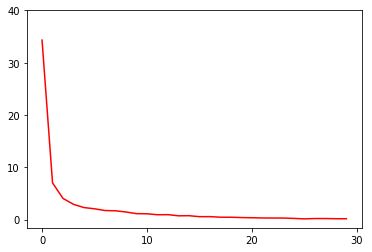

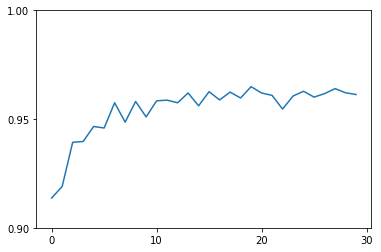

In [5]:
# plot the accuracy and loss
x_data = range(num_iter)
plt.plot(x_data, cost_all, color='r')
plt.xticks([0, 10, 20, 30]); plt.yticks([0, 10, 20, 30, 40])
plt.show()

plt.plot(x_data, acc_all)
plt.xticks([0, 10, 20, 30]); plt.yticks([0.9, 0.95, 1.0])
plt.show()

#sess.close()

#%%

In [ ]:
# round 2

In [6]:
#%% construct the mlp model

# hyper-parameters
learning_rate = 0.01
num_iter = 50
batch_size = 100
display_step = 10       # display the avg cost after this number of epochs

# variables
num_input = 784         # units in the input layer 28x28 images
num_hidden1 = 320       # units in the first hidden layer
num_hidden2 = 128
num_output = 10         # units in the output layer 0 to 9. OR nClasses

# trainum_inputg data and labels
x = tf.placeholder('float', [None, num_input])     # training data
y = tf.placeholder('float', [None, num_output])    # labels

# weights and biases
weights = {
    'w_h1' : tf.Variable(tf.random_normal([num_input, num_hidden1])),       # w1, from input layer to hidden layer 1
    'w_h2' : tf.Variable(tf.random_normal([num_hidden1, num_hidden2])),     # w2, from hidden layer 1 to hidden layer 2
    'w_out': tf.Variable(tf.random_normal([num_hidden2, num_output]))       # w3, from hidden layer 2 to output layer
}
biases = {
    'b_h1' : tf.Variable(tf.random_normal([num_hidden1])),                  # b1, to hidden layer 1 units
    'b_h2' : tf.Variable(tf.random_normal([num_hidden2])),
    'b_out': tf.Variable(tf.random_normal([num_output]))
}

# construct the model
model = multi_layer_perceptron_mnist(x, weights, biases)

# cost function and optimization
loss_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_func)

In [7]:
#%% Train and test

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

cost_all = np.array([])
acc_all = np.array([])

# Train the model
for iter in range(num_iter):
    avg_cost = 0.0
    num_batch = int(mnist.train.num_examples / batch_size)   # total number of batches
    for nB in range(num_batch):
        trainData, trainLabels = mnist.train.next_batch(batch_size=batch_size)
        tmp_cost, _ = sess.run([loss_func, optimizer], feed_dict={x: trainData, y: trainLabels})

        avg_cost = avg_cost + tmp_cost / num_batch

    correct_pred = tf.equal(tf.arg_max(model, 1), tf.arg_max(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, 'float'))
    acc = accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels})

    if iter % display_step == 0:
        print('Epoch: %04d' %(iter+1), 'cost= ' + "{:.5f}".format(avg_cost), 'accuracy: ' + "{:.5f}".format(acc))
    cost_all = np.append(cost_all, avg_cost)
    acc_all = np.append(acc_all, acc)
    
print('Optimization done...')

Epoch: 0001 cost= 37.38595 accuracy: 0.90720
Epoch: 0011 cost= 0.22138 accuracy: 0.93930
Epoch: 0021 cost= 0.12372 accuracy: 0.96260
Epoch: 0031 cost= 0.10148 accuracy: 0.96340
Epoch: 0041 cost= 0.09274 accuracy: 0.96400
Optimization done...


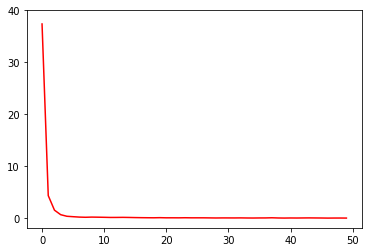

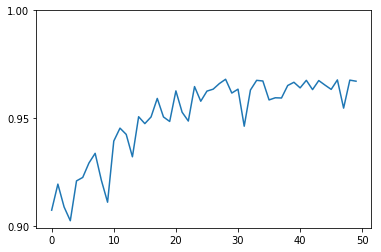

In [8]:
# plot the accuracy and loss
x_data = range(num_iter)
plt.plot(x_data, cost_all, color='r')
plt.xticks([0, 10, 20, 30, 40, 50]); plt.yticks([0, 10, 20, 30, 40])
plt.show()

plt.plot(x_data, acc_all)
plt.xticks([0, 10, 20, 30, 40, 50]); plt.yticks([0.9, 0.95, 1.0])
plt.show()

#sess.close()

#%%

In [ ]:
"""
Results:

Round 1
learning_rate = 0.01
num_iter = 30

num_input = 784
num_hidden1 = 128
num_hidden2 = 256
num_output = 10 

Epoch: 0021 cost= 0.32787 accuracy: 0.95280

Round 2
learning_rate = 0.01
num_iter = 30

# variables
num_input = 784
num_hidden1 = 256
num_hidden2 = 128
num_output = 10 

Epoch: 0021 cost= 0.15171 accuracy: 0.94160

Round 3
learning_rate = 0.01
num_iter = 30

# variables
num_input = 784
num_hidden1 = 256
num_hidden2 = 256
num_output = 10 

Epoch: 0021 cost= 0.44563 accuracy: 0.95130

Round 4
learning_rate = 0.01
num_iter = 30

# variables
num_input = 784
num_hidden1 = 320
num_hidden2 = 128
num_output = 10 

Epoch: 0021 cost= 0.14652 accuracy: 0.95260

Round 5
learning_rate = 0.01
num_iter = 50

# variables
num_input = 784
num_hidden1 = 320
num_hidden2 = 128
num_output = 10 

Epoch: 0041 cost= 0.07354 accuracy: 0.96480

"""

In [ ]:
# add a third layer

In [9]:
#%% create the MLP model

def multi_layer_perceptron_mnist(x, weights, biases):
    """
    MLP model with more than 2 hidden layers.
    """
    hidden_layer1 = tf.add(tf.matmul(x, weights['w_h1']), biases['b_h1'])
    hidden_layer1 = tf.nn.relu(hidden_layer1)   # apply ReLU non-linearity
    hidden_layer2 = tf.add(tf.matmul(hidden_layer1, weights['w_h2']), biases['b_h2'])
    hidden_layer2 = tf.nn.relu(hidden_layer2)
    hidden_layer3 = tf.add(tf.matmul(hidden_layer2, weights['w_h3']), biases['b_h3'])
    hidden_layer3 = tf.nn.relu(hidden_layer3)

    out_layer = tf.add(tf.matmul(hidden_layer3, weights['w_out']), biases['b_out'])  # NO non-linearity in the output layer

    return out_layer

In [15]:
#%% construct the mlp model

# hyper-parameters
learning_rate = 0.01
num_iter = 50
batch_size = 100
display_step = 10       # display the avg cost after this number of epochs

# variables
num_input = 784         # units in the input layer 28x28 images
num_hidden1 = 256       # units in the first hidden layer
num_hidden2 = 128
num_hidden3 = 64
num_output = 10         # units in the output layer 0 to 9. OR nClasses

# trainum_inputg data and labels
x = tf.placeholder('float', [None, num_input])     # training data
y = tf.placeholder('float', [None, num_output])    # labels

# weights and biases
weights = {
    'w_h1' : tf.Variable(tf.random_normal([num_input, num_hidden1])),       # w1, from input layer to hidden layer 1
    'w_h2' : tf.Variable(tf.random_normal([num_hidden1, num_hidden2])),     # w2, from hidden layer 1 to hidden layer 2
    'w_h3' : tf.Variable(tf.random_normal([num_hidden2, num_hidden3])),     # w2, from hidden layer 1 to hidden layer 2
    'w_out': tf.Variable(tf.random_normal([num_hidden3, num_output]))       # w3, from hidden layer 2 to output layer
}
biases = {
    'b_h1' : tf.Variable(tf.random_normal([num_hidden1])),                  # b1, to hidden layer 1 units
    'b_h2' : tf.Variable(tf.random_normal([num_hidden2])),
    'b_h3' : tf.Variable(tf.random_normal([num_hidden3])),
    'b_out': tf.Variable(tf.random_normal([num_output]))
}

# construct the model
model = multi_layer_perceptron_mnist(x, weights, biases)

# cost function and optimization
loss_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_func)

In [16]:
#%% Train and test

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

cost_all = np.array([])
acc_all = np.array([])

# Train the model
for iter in range(num_iter):
    avg_cost = 0.0
    num_batch = int(mnist.train.num_examples / batch_size)   # total number of batches
    for nB in range(num_batch):
        trainData, trainLabels = mnist.train.next_batch(batch_size=batch_size)
        tmp_cost, _ = sess.run([loss_func, optimizer], feed_dict={x: trainData, y: trainLabels})

        avg_cost = avg_cost + tmp_cost / num_batch

    correct_pred = tf.equal(tf.arg_max(model, 1), tf.arg_max(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, 'float'))
    acc = accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels})

    if iter % display_step == 0:
        print('Epoch: %04d' %(iter+1), 'cost= ' + "{:.5f}".format(avg_cost), 'accuracy: ' + "{:.5f}".format(acc))
    cost_all = np.append(cost_all, avg_cost)
    acc_all = np.append(acc_all, acc)
    
print('Optimization done...')

Epoch: 0001 cost= 112.43217 accuracy: 0.90140
Epoch: 0011 cost= 0.37934 accuracy: 0.94050
Epoch: 0021 cost= 0.17337 accuracy: 0.94150
Epoch: 0031 cost= 0.16361 accuracy: 0.94020
Epoch: 0041 cost= 0.24896 accuracy: 0.88920
Optimization done...


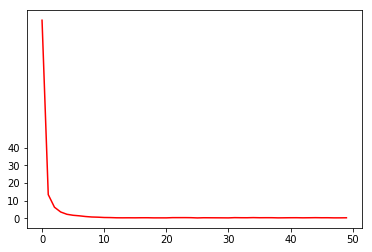

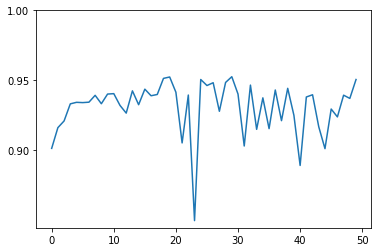

In [17]:
# plot the accuracy and loss
x_data = range(num_iter)
plt.plot(x_data, cost_all, color='r')
plt.xticks([0, 10, 20, 30, 40, 50]); plt.yticks([0, 10, 20, 30, 40])
plt.show()

plt.plot(x_data, acc_all)
plt.xticks([0, 10, 20, 30, 40, 50]); plt.yticks([0.9, 0.95, 1.0])
plt.show()

#sess.close()

#%%